In [116]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [117]:
x_train=torch.tensor([x for x in range(1,11)])
y_train=torch.tensor([x**2 for x in x_train])
z      =torch.tensor([x**3 for x in range(1,11)])

# 1. Using one weight variable : wx + b

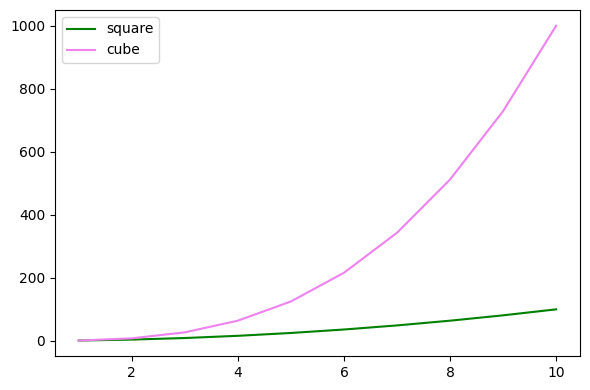

In [118]:
plt.figure(figsize=(6,4))
plt.plot(x_train,y_train, color='green', label='square')
plt.plot(x_train,z, color='violet', label='cube')
plt.tight_layout()
plt.legend()
plt.show()
# plt.scatter(x_train,y_train, color='red', marker='+')

In [119]:
class Linear_Regression(nn.Module):
  def __init__(self):
    # Set up the weights and biases
    super().__init__()
    seed=42
    torch.manual_seed(seed) # Set the seed before creating the tensors
    self.weight=nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float64)) # Changed the order of arguments

    torch.manual_seed(seed) # Set the seed again for reproducibility
    self.bias  =nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float64)) # Changed the order of arguments

    self.optimizer=torch.optim.SGD([self.weight, self.bias], lr=0.001)

  def forward(self):
    y_pred=self.weight*x_train+self.bias
    return y_pred

In [120]:
x=Linear_Regression()

## 1.1 - Before training

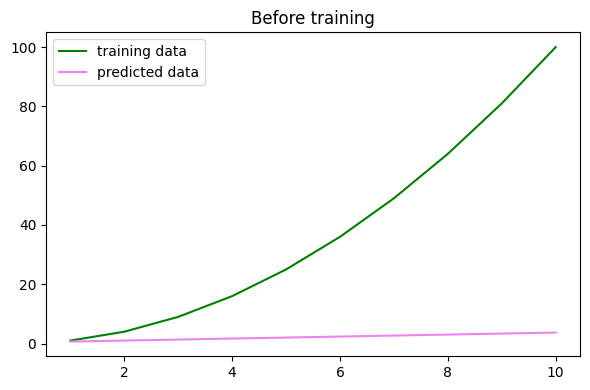

In [121]:
plt.figure(figsize=(6,4))
plt.title("Before training")
plt.plot(x_train,y_train, color='green', label='training data')
plt.plot(x_train,x.forward().detach(), color='violet', label='predicted data')
plt.tight_layout()
plt.legend()
plt.show()
# plt.scatter(x_train,y_train, color='red', marker='+')

In [122]:
loss=nn.L1Loss()
epochs=100

for epoch in range(epochs):
  # Forward pass
  y_pred=x.forward()
  # Compute the loss
  _loss=loss(y_pred,y_train)
  # Zero grad
  x.optimizer.zero_grad()
  # Find gradients
  _loss.backward()
  # Optimize gradients
  x.optimizer.step()
  x.eval()

In [123]:
x.state_dict()

OrderedDict([('weight', tensor([0.8769], dtype=torch.float64)),
             ('bias', tensor([0.4269], dtype=torch.float64))])

## 1.2 - After training

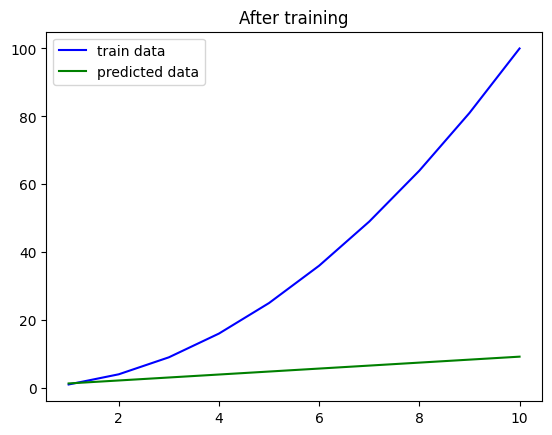

In [124]:
plt.title("After training")
plt.plot(x_train, y_train, color='blue', label='train data')
plt.plot(x_train,x.forward().detach(), color='green', label='predicted data')
plt.legend()

# 2. Using two weight variables: w1 * x^2 + w2 * x + b

In [125]:
class Linear_Regression_Square(nn.Module):
  def __init__(self):
    # Set up the weights and biases
    super().__init__()
    seed=91
    torch.manual_seed(seed) # Set the seed before creating the tensors
    self.weight_x_sqrd=nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float64)) # Changed the order of arguments 

    torch.manual_seed(seed) # Set the seed before creating the tensors
    self.weight_x=nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float64)) # Changed the order of arguments
    torch.manual_seed(seed) # Set the seed again for reproducibility
    self.bias  =nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float64)) # Changed the order of arguments

    self.optimizer=torch.optim.SGD([self.weight_x_sqrd, self.weight_x, self.bias], lr=0.001)

  def forward(self):
    for epoch in range(epochs):
      square=self.weight_x_sqrd*torch.square(x_train)
      y_pred=self.weight_x_sqrd*square+self.weight_x*x_train+self.bias
      return y_pred
        

## 2.1 Before training

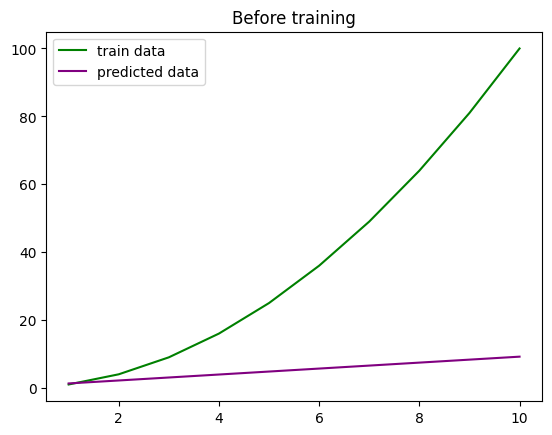

In [126]:
plt.title("Before training")
plt.plot(x_train, y_train, color='green', label='train data')
plt.plot(x_train, x.forward().detach(), color='purple', label='predicted data')
plt.legend()
plt.show()

In [127]:
x=Linear_Regression_Square()

loss=nn.L1Loss()
epochs=100

for epoch in range(epochs):
  # Forward pass
  y_pred=x.forward()
  # Compute the loss
  _loss=loss(y_pred,y_train)
  # Zero grad
  x.optimizer.zero_grad()
  # Find gradients
  _loss.backward()
  # Optimize gradients
  x.optimizer.step()
  # x.eval()

x.state_dict()

OrderedDict([('weight_x_sqrd', tensor([-1.1290], dtype=torch.float64)),
             ('weight_x', tensor([-0.9643], dtype=torch.float64)),
             ('bias', tensor([-1.0191], dtype=torch.float64))])

## 2.2 After training

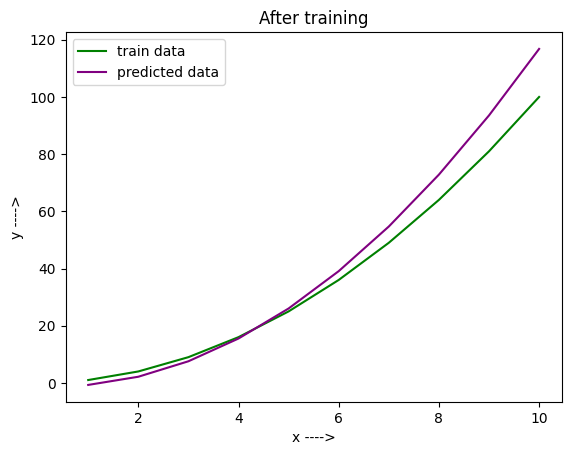

In [128]:
plt.title("After training")
plt.plot(x_train, y_train, color='green', label='train data')
plt.plot(x_train,x.forward().detach(), color='purple', label='predicted data')
plt.xlabel('x ---->')
plt.ylabel('y ---->')
plt.legend()
plt.show()

In [129]:
x.state_dict()

OrderedDict([('weight_x_sqrd', tensor([-1.1290], dtype=torch.float64)),
             ('weight_x', tensor([-0.9643], dtype=torch.float64)),
             ('bias', tensor([-1.0191], dtype=torch.float64))])